In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/HP/OneDrive/Desktop/Machine Learning(u)/Data Files/3. ST Academy - Decision Trees resource files/Movie_regression.csv", header = 0)

In [4]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


* here, 'Collection' is our response variable and others are predictor variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

#### Missing value Imputation

In [6]:
df.describe()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,494.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,45057.707510
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.295161,104.779133,12.513697,106.332889,18364.351764
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.300000,223.796000,28.000000,465.000000,34050.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,160.000000,254.400000,39.000000,535.500000,42400.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.890000,283.416000,50.000000,614.750000,50000.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000


In [7]:
df['Time_taken'].fillna(value = df['Time_taken'].mean(), inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

#### Dummy variable creation

In [9]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [10]:
df = pd.get_dummies(df, columns = ["3D_available", "Genre"], drop_first = True)

In [11]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


##### Dependent-Independent variable split

In [18]:
X = df.loc[:, df.columns != "Collection"]

In [19]:
type(X)

pandas.core.frame.DataFrame

In [20]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [21]:
X.shape

(506, 19)

In [23]:
y = df["Collection"]

In [24]:
type(df)

pandas.core.frame.DataFrame

In [25]:
y.shape

(506,)

In [26]:
y.head()

0    48000
1    43200
2    69400
3    66800
4    72400
Name: Collection, dtype: int64

### Test-Train Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

### Training Regression Tree

In [29]:
from sklearn import tree

In [30]:
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [31]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

### Predict values using Trained model

In [34]:
y_train_pred = regtree.predict(X_train)

In [38]:
y_test_pred = regtree.predict(X_test)

In [39]:
y_test_pred

array([ 46187.35632184, 100000.        ,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  23514.28571429,  23514.28571429,
        23514.28571429,  23514.28571429,  91860.86956522,  65183.33333333,
        46187.35632184,  65183.33333333,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        91860.86956522,  35137.77777778,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        23514.28571429, 100000.        ,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  35137.77777778,  35137.77777778,
        35137.77777778,  46187.35632184,  35137.77777778,  35137.77777778,
        46187.35632184,  

In [40]:
X_train_pred

array([ 65183.33333333,  46187.35632184,  65183.33333333,  46187.35632184,
        23514.28571429,  35137.77777778,  46187.35632184,  46187.35632184,
        65183.33333333,  23514.28571429,  35137.77777778,  35137.77777778,
        35137.77777778,  35137.77777778,  23514.28571429,  46187.35632184,
        23514.28571429,  91860.86956522,  46187.35632184,  23514.28571429,
        35137.77777778,  46187.35632184,  46187.35632184,  35137.77777778,
        65183.33333333,  35137.77777778,  46187.35632184,  65183.33333333,
        23514.28571429,  23514.28571429,  35137.77777778,  35137.77777778,
        23514.28571429,  65183.33333333,  46187.35632184,  35137.77777778,
        46187.35632184,  23514.28571429,  23514.28571429,  46187.35632184,
        65183.33333333,  46187.35632184,  46187.35632184,  35137.77777778,
        65183.33333333,  65183.33333333,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  35137.77777778,  46187.35632184,
        35137.77777778,  

### Model Performance

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
mean_squared_error(y_test_pred, y_test) #useful while comparing models

117077216.27161306

In [45]:
r2_score(y_train_pred , y_train)

0.804492865092163

In [44]:
r2_score(y_test_pred, y_test)

0.6496912422074306

### Plotting Decision Tree

In [47]:
dot_data = tree.export_graphviz(regtree, out_file = None)

In [49]:
from IPython.display import Image

In [50]:
import pydotplus

In [51]:
graph = pydotplus.graph_from_dot_data(dot_data)

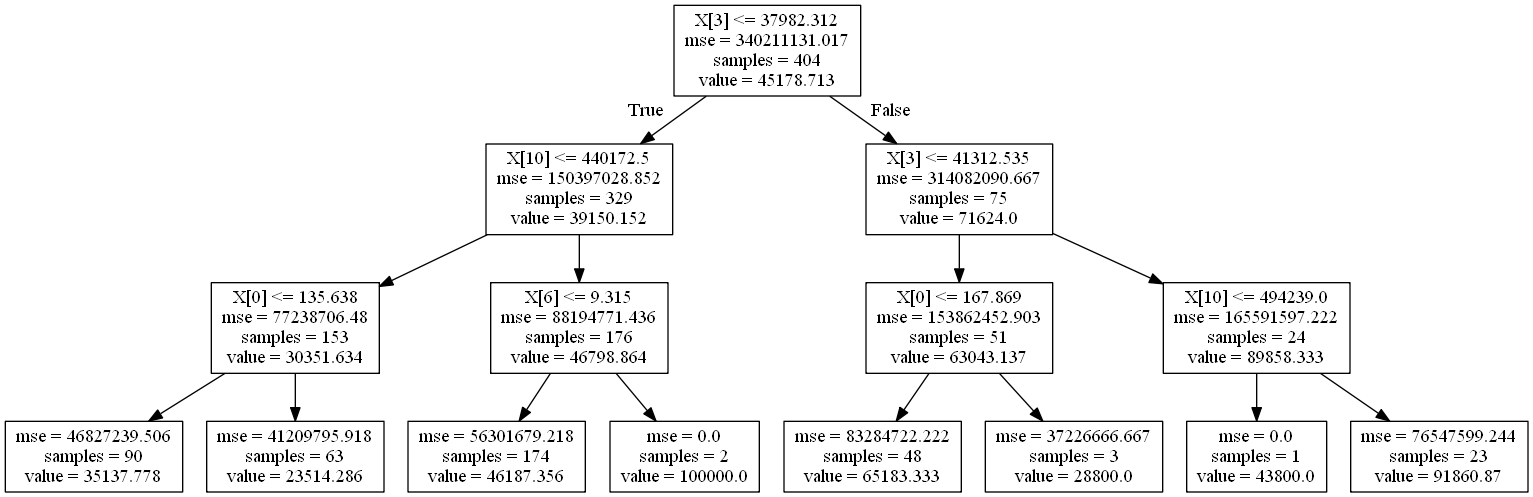

In [52]:
Image(graph.create_png())

### Controlling Tree Growth(Pruning)

#### 1) Maximum no. of levels in tree

In [53]:
regtree1 = tree.DecisionTreeRegressor(max_depth = 3)

In [58]:
regtree1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [60]:
dot_data = tree.export_graphviz(regtree1, out_file = None, feature_names = X_train.columns, filled = True )

In [62]:
graph1 = pydotplus.graph_from_dot_data(dot_data)

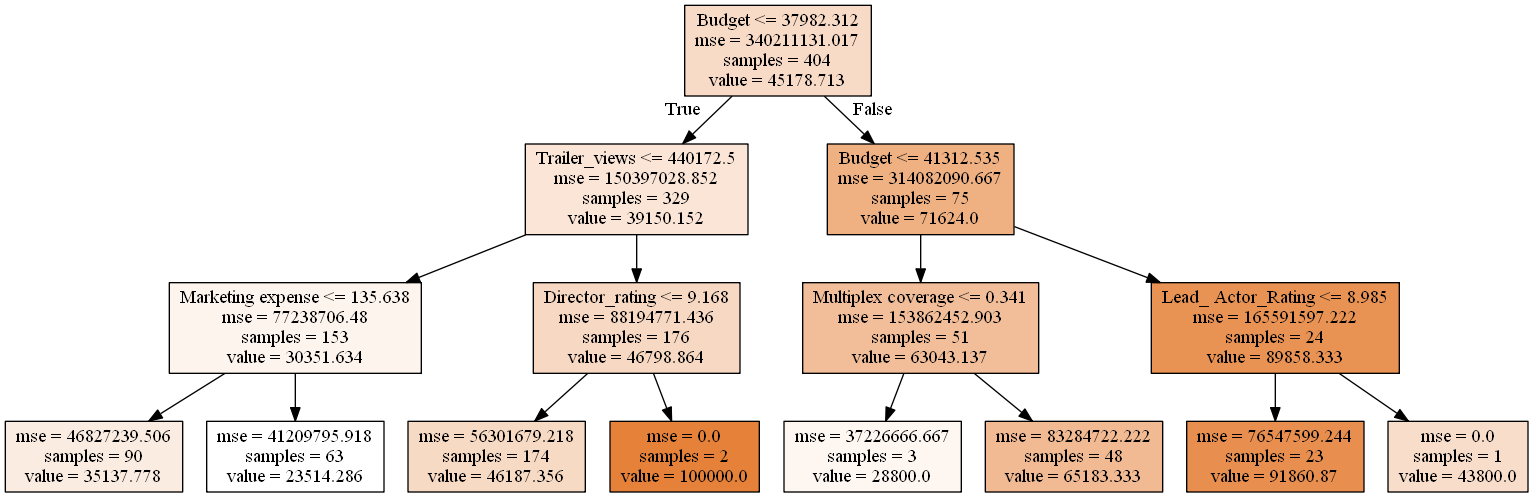

In [63]:
Image(graph1.create_png())

#### 2) Minimum observations at internal node

In [65]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 40)

In [66]:
regtree2.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_split=40)

In [74]:
dot_data = tree.export_graphviz(regtree2, out_file = None, feature_names = X_train.columns, filled = True )

In [75]:
graph2 = pydotplus.graph_from_dot_data(dot_data)

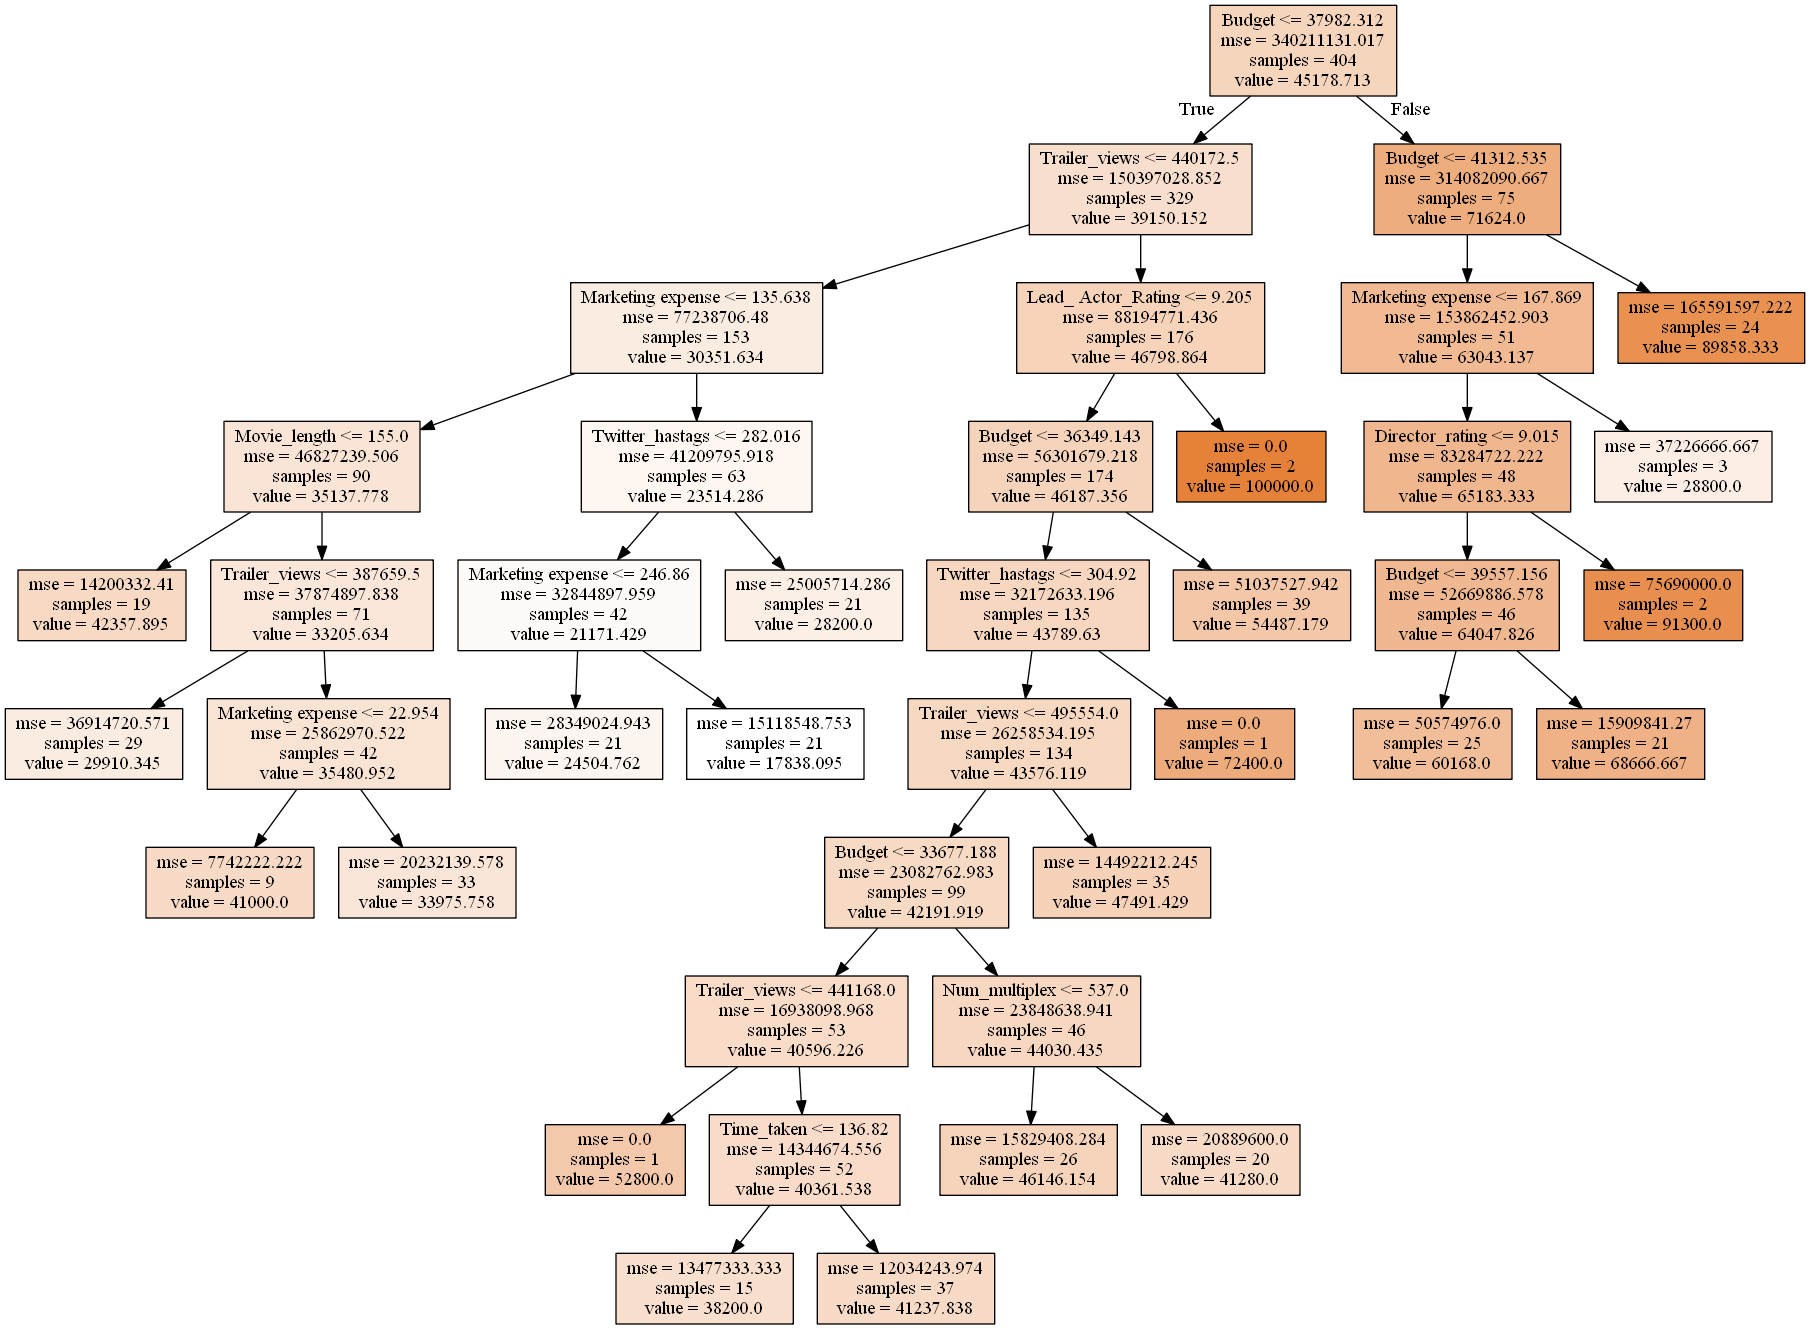

In [76]:
Image(graph2.create_png())

#### Minimum Observations at Leaf node

In [77]:
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 25)

In [78]:
regtree3.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=25)

In [79]:
dot_data = tree.export_graphviz(regtree3, out_file = None, feature_names = X_train.columns, filled = True )

In [80]:
graph3 = pydotplus.graph_from_dot_data(dot_data)

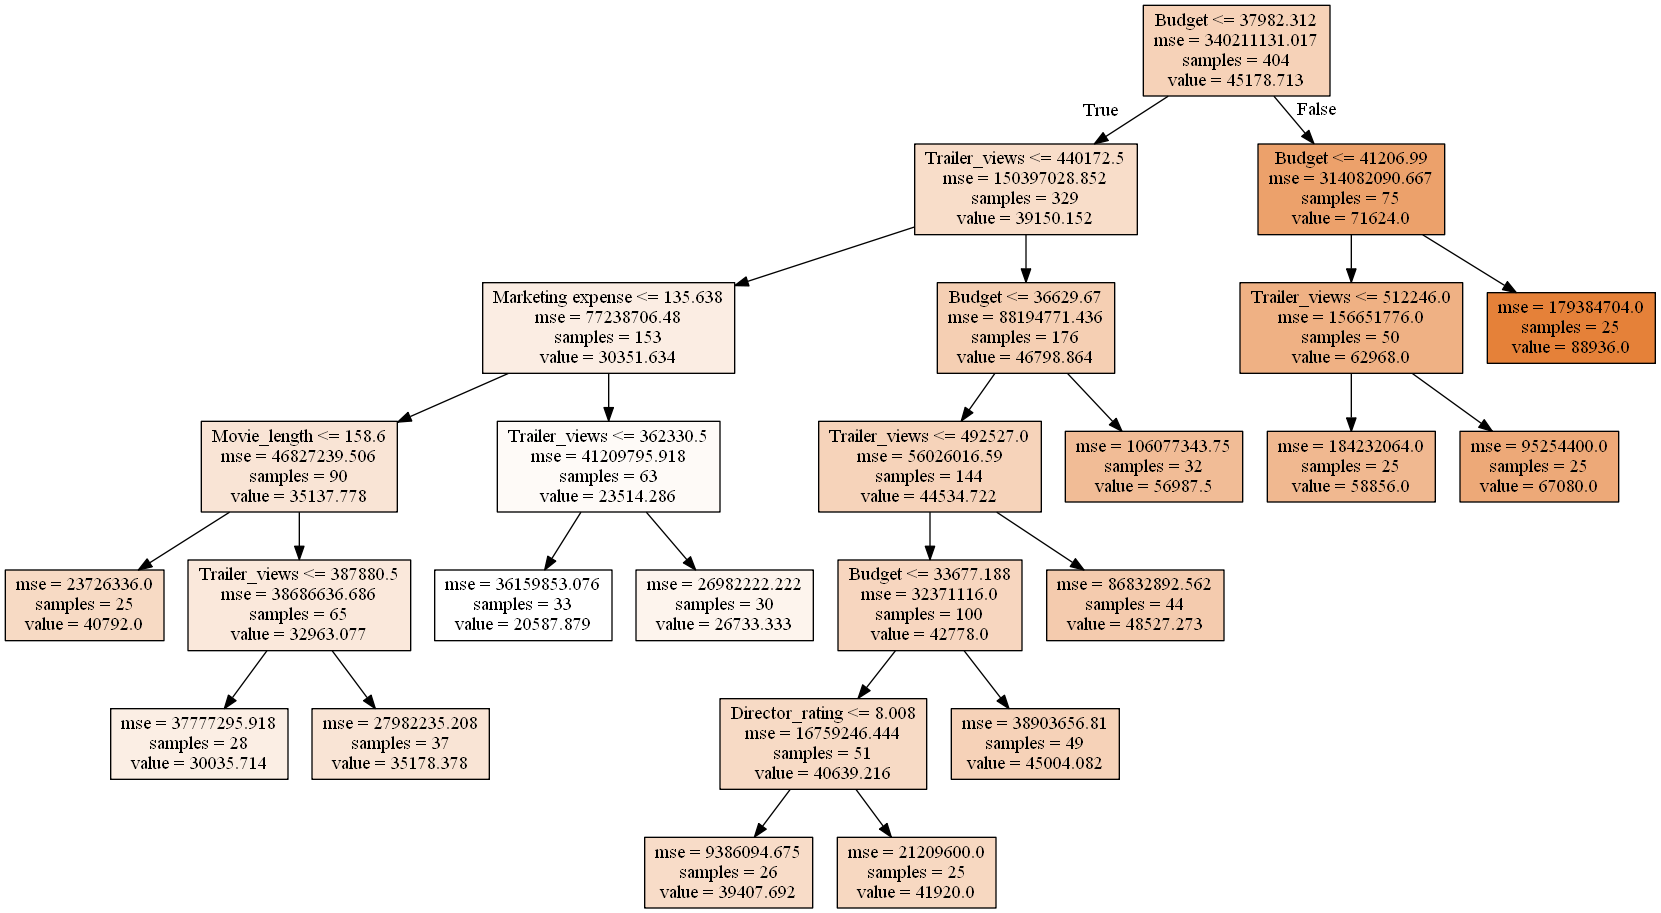

In [81]:
Image(graph3.create_png())